In [2]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from procedimento import projetos
import datetime

# Calculadora de datas

In [8]:
###### Definir data inicial #####################
                                                # 
data_inicial = datetime.date(2022, 10, 7)       #
                                                #
#################################################

projetos = pd.DataFrame(projetos)

datas_dos_processos = projetos.drop(["color","marker"])

for processo_key in datas_dos_processos:

    processo = datas_dos_processos[processo_key]

    delta_inicio = datetime.timedelta(days=processo.inicio)

    delta_fim = datetime.timedelta(days=processo.fim-1)

    processo.inicio = data_inicial + delta_inicio

    processo.fim = data_inicial + delta_fim

datas_dos_processos.transpose()

,inicio,fim
Aterramento,2022-10-07,2022-10-13
Posicionamento NCU,2022-10-07,2022-10-11
Alimentação,2022-10-07,2022-10-13
Rotas,2022-10-12,2022-10-15
C. Comando,2022-10-12,2022-10-15
Mem. Cabos,2022-10-16,2022-10-18
Quantitativo,2022-10-16,2022-10-18
Documentação,2022-10-19,2022-10-20
Revisão,2022-10-21,2022-10-27


# Plots

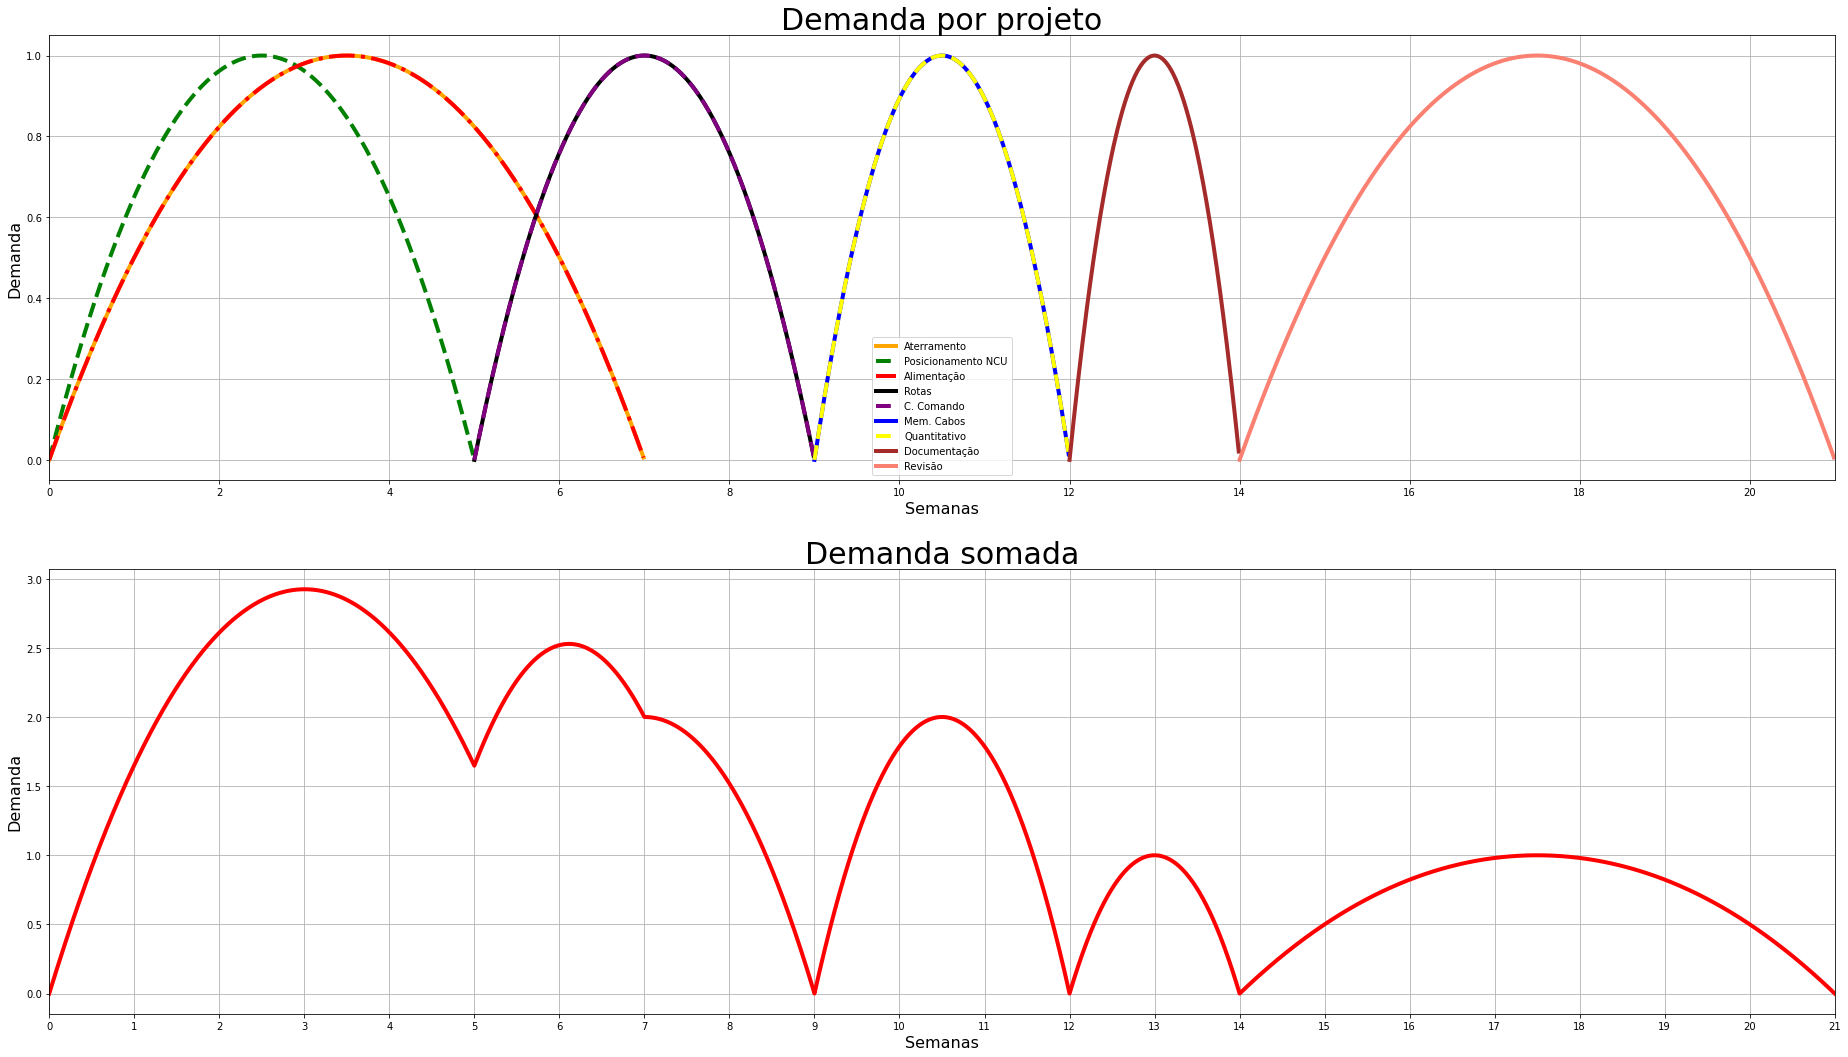

In [61]:
fig = plt.figure(figsize=[32,18])
ax = fig.subplots(2,1)

inicio = 0
final = 21
k=100
n_curvas = 5

time_line = np.linspace(inicio,final,num=((final-inicio)*k)+1)


demanda_somada = np.zeros(len(time_line))

for projeto in projetos:
    obj = projetos[projeto]

    start_point = int(np.argwhere(obj.inicio == time_line))

    end_point = int(np.argwhere(obj.fim == time_line))

    time_scale = time_line[start_point:end_point]

    time_scale = np.sort(time_scale)

    distribution_kernel = stats.gaussian_kde([obj.inicio,obj.fim])

    # Normalizing data

    norm_distribution = MinMaxScaler().fit_transform(distribution_kernel(time_scale).reshape(-1, 1))

    for i in range(len(norm_distribution)):

        j = np.argwhere(time_scale[i]==time_line)

        demanda_somada[j] += norm_distribution[i]

    # Plot the Probability Distribuction Function (PDF)

    ax[0].set_ylabel('Demanda',fontsize=16)
    ax[0].set_xlabel("Semanas",fontsize=16)
    ax[0].set_title('Demanda por projeto',fontsize=30)
        
    ax[0].plot(
        time_scale, 
        norm_distribution,
        color=obj.color, 
        linestyle=obj.marker, 
        linewidth=4, 
        label=projeto)

ax[0].grid()
ax[0].legend()
ax[0].locator_params(axis='x', nbins=20)
ax[0].set_xlim(0,21)

# Plotando demanda somada

ax[1].set_ylabel('Demanda',fontsize=16)
ax[1].set_xlabel("Semanas",fontsize=16)
ax[1].set_title('Demanda somada',fontsize=30)
    
ax[1].plot(
    time_line, 
    demanda_somada,
    color="red", 
    linestyle="-", 
    linewidth=4, 
    )        

ax[1].grid()
ax[1].locator_params(axis='x', nbins=30)
ax[1].set_xlim(0,21)

plt.show()
fig.savefig('Analise_de_projetos.pdf', bbox_inches='tight')

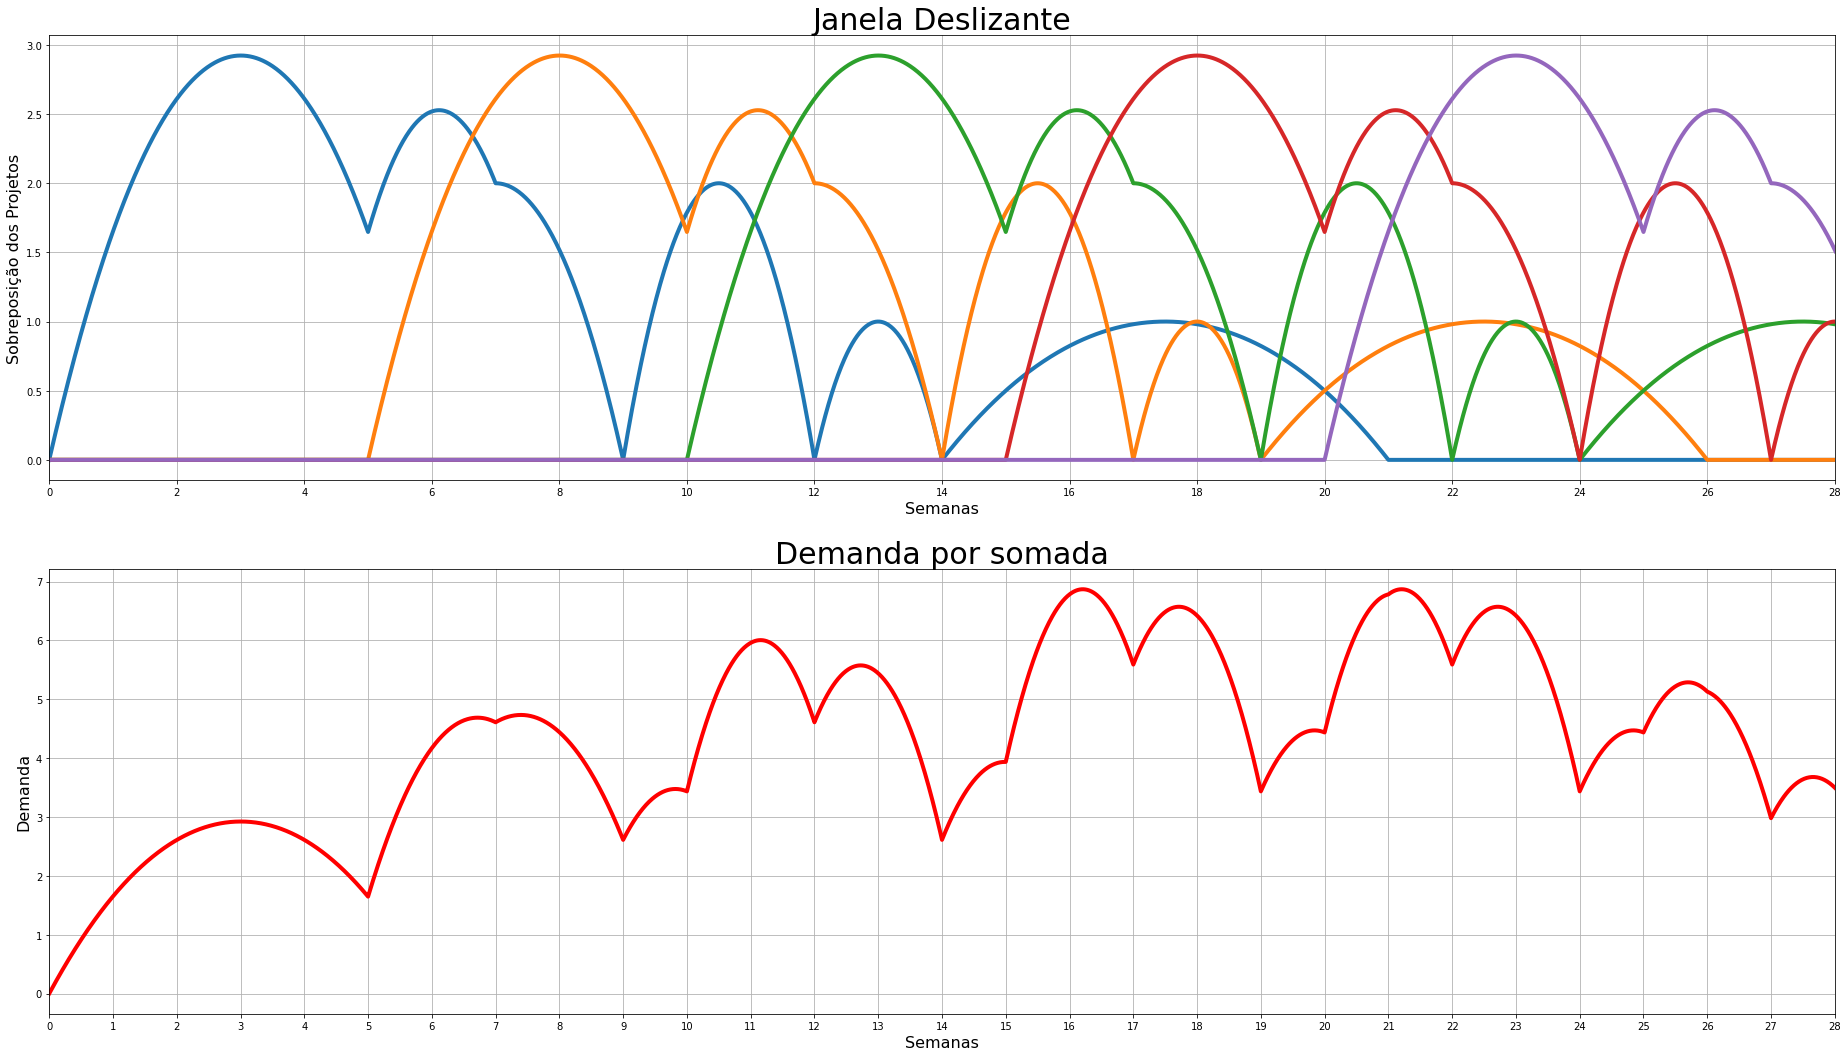

In [57]:
fig = plt.figure(figsize=[32,18])
ax = fig.subplots(2,1)


off_set = 2

while True:
    n_curvas = int(np.ceil(21 / off_set))

    curvas_dict = {}


    total = off_set * n_curvas * k

    extended_time_line = np.linspace(
        inicio,
        (final+off_set * n_curvas),
        num=(((final+off_set * n_curvas)-inicio)*k)+1
        )

    for i in range(n_curvas):

        curva = []
        
        before = i * off_set * k

        after = (total - before)

        # print(before, after)

        curva = [0 for i in range(before)]

        # print(len(curva))

        for demanda in demanda_somada: curva.append(demanda)

        # print(len(curva))

        for j in range(after): curva.append(0)

        # print(len(curva))
        # print('_'*20)

        curvas_dict[i] = curva

    demanda_total = []

    for i in range(len(extended_time_line)):

        soma = 0

        for j in curvas_dict:
            
            curva = curvas_dict[j]

            soma += curva[i]

        demanda_total.append(soma)

    if max(demanda_total) <= 8:
        break

    off_set += 1


ax[0].set_ylabel('Sobreposição dos Projetos',fontsize=16)
ax[0].set_xlabel("Semanas",fontsize=16)
ax[0].set_title('Janela Deslizante',fontsize=30)
    

for i in curvas_dict:
    
    curva = curvas_dict[i]

    ax[0].plot(
    extended_time_line, 
    curva,
    linewidth=4, 
    )

ax[0].grid()
ax[0].locator_params(axis='x', nbins=20)
ax[0].set_xlim(0,28)

# Plotando demanda somada

ax[1].set_ylabel('Demanda',fontsize=16)
ax[1].set_xlabel("Semanas",fontsize=16)
ax[1].set_title('Demanda por somada',fontsize=30)
    
ax[1].plot(
    extended_time_line, 
    demanda_total,
    color="red", 
    linestyle="-", 
    linewidth=4, 
    )        

ax[1].grid()
ax[1].locator_params(axis='x', nbins=30)
ax[1].set_xlim(0,28)

plt.show()
fig.savefig('Sliding_window_de_projetos.pdf', bbox_inches='tight')
